In [1]:
import geopandas as gpd
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')

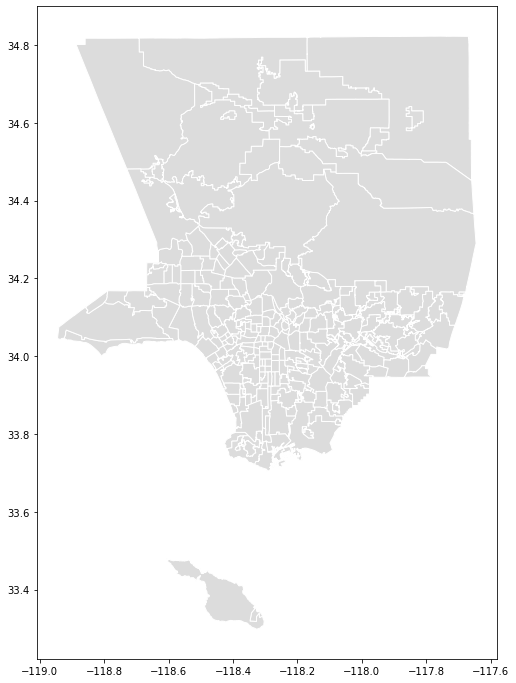

In [2]:
neighborhoods = neighborhoods[['name','geometry']]
ax=neighborhoods.plot(figsize=(12,12),color='gainsboro', edgecolor='white')

In [3]:
import pandas as pd
import plotly.express as px
from sodapy import Socrata
client = Socrata("data.lacity.org", None)

results = client.get("ax8j-dhzm", 
                     limit=5000,)

df = pd.DataFrame.from_records(results)

df.head()

locationtype                             location_name stnumber  \
0      Beaches                              Venice Beach     1800   
1      Beaches                            Cabrillo Beach     3720   
2        Camps                   Griffith Park Boys Camp     4730   
3        Camps        Otis Wallace Children's Campground    11770   
4        Camps  Griffith Park - Hollywoodland Girls Camp     3200   

             stname stsuffix  \
0       Ocean Front     Walk   
1  Stephen M. White       Dr   
2   Crystal Springs       Dr   
3          Foothill     Blvd   
4            Canyon       Dr   

                                                city state    zip  \
0  {'latitude': '33.985', 'longitude': '-118.474'...    CA  90291   
1  {'latitude': '33.7112', 'longitude': '-118.283...    CA  90731   
2  {'latitude': '34.139', 'longitude': '-118.298'...    CA  90027   
3  {'latitude': '34.2657', 'longitude': '-118.396...    CA  91342   
4  {'latitude': '34.1255', 'longitude': '-118.314...    CA  90068   

                                             website           phone  ...  \
0  http://www.laparks.org/dos/reccenter/facility/...  (310) 399-2775  ...   
1  http://www.laparks.org/dos/aquatic/facility/ca...  (310) 548-7554  ...   
2      http://www.laparks.org/dos/camps/griffith.htm  (323) 664-0571  ...   
3                                                NaN  (818) 756-8060  ...   
4  http://www.laparks.org/dos/camps/hollywoodland...  (323) 467-7193  ...   

  :@computed_region_tatf_ua23 :@computed_region_2dna_qi2s stdirection  \
0                         NaN                         NaN         NaN   
1                         793                         NaN         NaN   
2                        1325                           3         NaN   
3                         248                           9         NaN   
4                         543                          64         NaN   

  addresstype addresstypevalue :@computed_region_ur2y_g4cx crossstname  \
0         NaN              NaN                         NaN         NaN   
1         NaN              NaN                         NaN         NaN   
2         NaN              NaN                         NaN         NaN   
3         NaN              NaN                         NaN         NaN   
4         NaN              NaN                         NaN         NaN   

  stnumberfraction crossstsuffix stsuffixdirection  
0              NaN           NaN               NaN  
1              NaN           NaN               NaN  
2              NaN           NaN               NaN  
3              NaN           NaN               NaN  
4              NaN           NaN               NaN  

[5 rows x 26 columns]

In [4]:
df.geolong = df.geolong.astype('float')
df.geolat = df.geolat.astype('float')
df.geolong.describe()
df.loc[250].geolong
df.at[250,'geolong'] = -df.loc[250].geolong

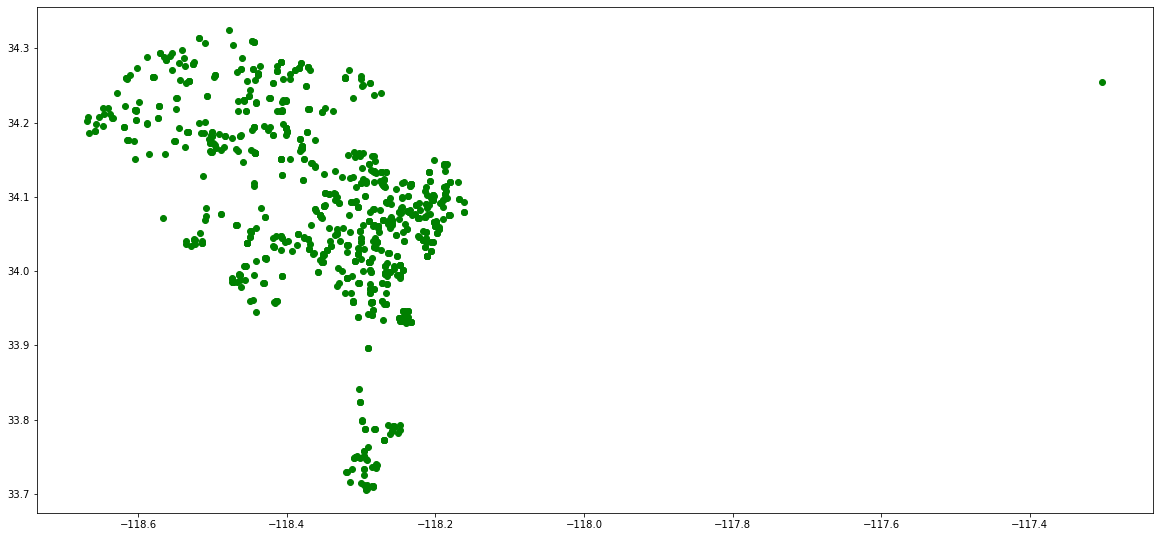

In [5]:
parks = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.geolong, df.geolat))
parks.plot(figsize=(20,20),color='green')

In [6]:
parks[parks.geolong>-117.4]

locationtype location_name stnumber       stname stsuffix  \
5        Camps    Camp Seely      250  Highway 138      NaN   

                                                city state    zip  \
5  {'latitude': '34.2539', 'longitude': '-117.303...    CA  92325   

                                      website           phone  ...  \
5  http://www.laparks.org/dos/camps/seely.htm  (213) 485-4853  ...   

  :@computed_region_2dna_qi2s  stdirection  addresstype addresstypevalue  \
5                         NaN            N       PO Box             3372   

  :@computed_region_ur2y_g4cx crossstname stnumberfraction crossstsuffix  \
5                         NaN         NaN              NaN           NaN   

  stsuffixdirection                     geometry  
5               NaN  POINT (-117.30288 34.25387)  

[1 rows x 27 columns]

In [1]:
#We have an outlier in our data, as seen above, we need to drop it 

In [7]:
parks.drop(parks[parks.geolong>-117.4].index,inplace=True)

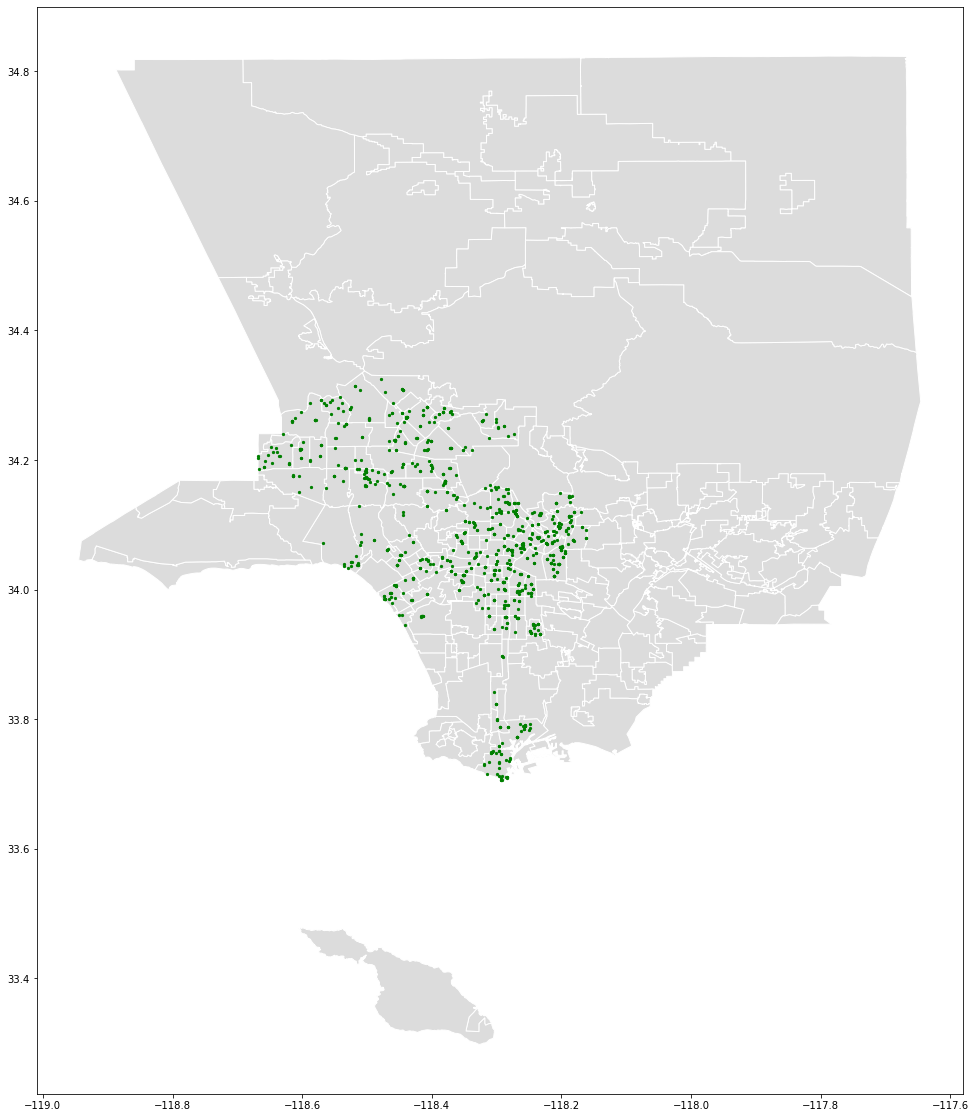

In [8]:
base = neighborhoods.plot(figsize=(20,20),color='gainsboro', edgecolor='white')
ax = parks.plot(ax=base, color='green', markersize=5)

-118.668691
-118.161574
33.705524
34.324324


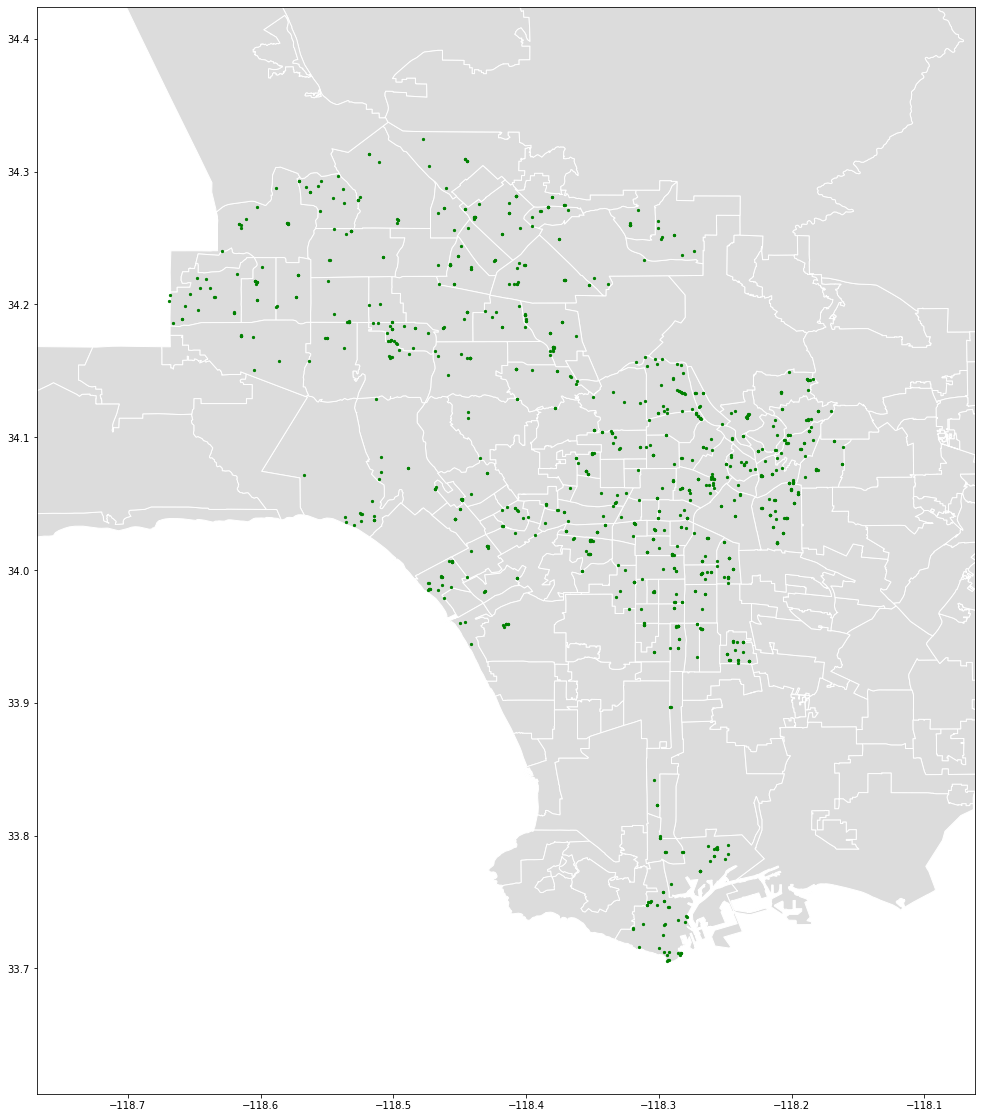

In [9]:
parks.geometry.total_bounds
minx, miny, maxx, maxy = parks.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)
base = neighborhoods.plot(figsize=(20,20),color='gainsboro', edgecolor='white')
ax = parks.plot(ax=base, marker='o', color='green', markersize=5)
ax.set_xlim(minx - .1, maxx + .1) 

# added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - .1, maxy + .1)
ax

In [10]:
parks.set_crs(epsg=4326, inplace=True)
parks.crs
neighborhoods.crs
join = gpd.sjoin(neighborhoods,
                 parks,
                 how='right')
join.head ()

index_left             name             locationtype  \
384         1.0  Adams-Normandie                    Parks   
594         1.0  Adams-Normandie  Public Computer Centers   
691         1.0  Adams-Normandie       Recreation Centers   
336         1.0  Adams-Normandie                    Parks   
898         1.0  Adams-Normandie            Tennis Courts   

                                         location_name stnumber    stname  \
384              Elinor and Don Richardson Family Park     2700   Budlong   
594  Loren Miller Youth Center - Public Computer Ce...     2717  Halldale   
691                     Loren Miller Recreation Center     2717  Halldale   
336                                  Loren Miller Park     2717  Halldale   
898                         Loren Miller Tennis Courts     2717  Halldale   

    stsuffix                                               city state    zip  \
384      Ave  {'latitude': '34.0301', 'longitude': '-118.296...    CA  90007   
594      Ave  {'latitude': '34.0303', 'longitude': '-118.303...    CA  90018   
691      Ave  {'latitude': '34.0303', 'longitude': '-118.303...    CA  90018   
336      Ave  {'latitude': '34.0303', 'longitude': '-118.303...    CA  90018   
898      Ave  {'latitude': '34.0305', 'longitude': '-118.304...    CA  90018   

     ... :@computed_region_2dna_qi2s stdirection addresstype  \
384  ...                          32           S         NaN   
594  ...                          32         NaN         NaN   
691  ...                          32         NaN         NaN   
336  ...                          32         NaN         NaN   
898  ...                          32         NaN         NaN   

     addresstypevalue  :@computed_region_ur2y_g4cx crossstname  \
384               NaN                            7         NaN   
594               NaN                            7         NaN   
691               NaN                            7         NaN   
336               NaN                            7         NaN   
898               NaN                            7         NaN   

    stnumberfraction crossstsuffix stsuffixdirection  \
384              NaN           NaN               NaN   
594              NaN           NaN               NaN   
691              NaN           NaN               NaN   
336              NaN           NaN               NaN   
898              NaN           NaN               NaN   

                        geometry  
384  POINT (-118.29581 34.03013)  
594  POINT (-118.30303 34.03026)  
691  POINT (-118.30303 34.03026)  
336  POINT (-118.30303 34.03026)  
898  POINT (-118.30373 34.03054)  

[5 rows x 29 columns]

In [11]:
parks_by_neighborhoods = join.name.value_counts().rename_axis('name').reset_index(name='park_count')
parks_by_neighborhoods.head(10)

name  park_count
0           Boyle Heights          46
1               San Pedro          36
2           Griffith Park          36
3         North Hollywood          24
4                   Watts          23
5                 Pacoima          23
6                  Venice          21
7         Central-Alameda          19
8  Baldwin Hills/Crenshaw          19
9              Wilmington          19

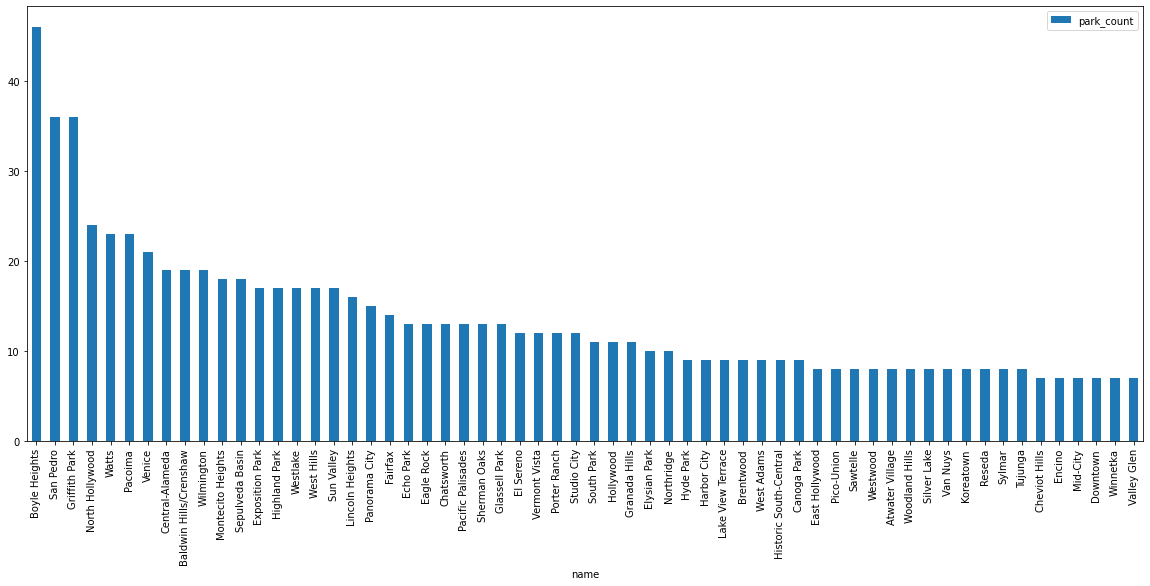

In [12]:
parks_by_neighborhoods[:60].plot.bar(figsize=(20,8),x='name',y='park_count')

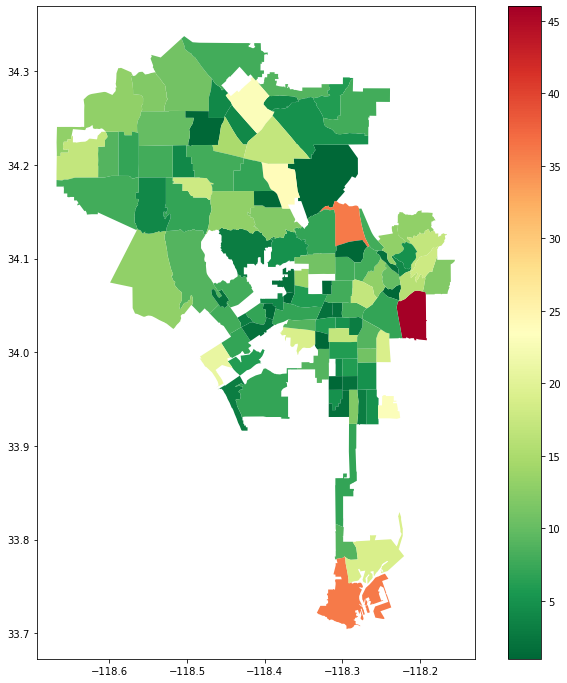

In [13]:
neighborhoods=neighborhoods.merge(parks_by_neighborhoods,on='name')
neighborhoods.plot(figsize=(12,12),column='park_count',legend=True,cmap='RdYlGn_r')

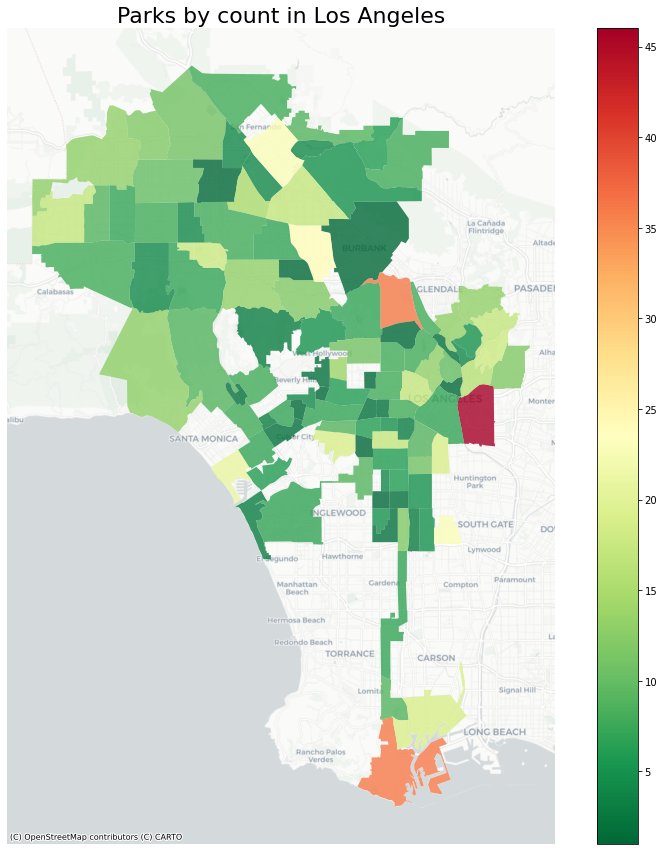

In [16]:
import contextily as ctx
neighborhoods = neighborhoods.to_crs(epsg=3857)
ax = neighborhoods.plot(figsize=(15,15),
                        column='park_count',
                        legend=True,
                        alpha=0.8,
                        cmap='RdYlGn_r')

ax.axis('off')
ax.set_title('Parks by count in Los Angeles',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [15]:
import plotly.express as px
neighborhoods = neighborhoods.to_crs(epsg=4326)
neighborhoods.crs
minx, miny, maxx, maxy = neighborhoods.geometry.total_bounds

center_lat=(maxy-miny)/2+miny
center_lat

center_lon=(maxx-minx)/2+minx
center_lon
fig1 = px.choropleth_mapbox(neighborhoods, 
                           geojson=neighborhoods.geometry, 
                           locations=neighborhoods.index, 
                           color='park_count',
                           color_continuous_scale="rdylgn_r",
                           mapbox_style="carto-positron",
                           zoom=9, 
                           center = {"lat": center_lat, "lon": center_lon},
                           hover_name=neighborhoods.name,
                           opacity=0.5
                          )
fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig1.show()

In [19]:
fig1.write_html("laparkcount.html")

In [17]:
import pandas as pd
import plotly.express as px
from sodapy import Socrata
import geopandas as gpd

In [18]:
client = Socrata("data.lacity.org", None)

results = client.get("ax8j-dhzm", limit=2000)

df = pd.DataFrame.from_records(results)

df.sample(2)

locationtype               location_name stnumber  \
895              Tennis Courts      Westwood Tennis Courts     1350   
135  Outdoor Fitness Equipment  Wall Street Community Park     8620   

        stname stsuffix                                               city  \
895  Sepulveda     Blvd  {'latitude': '34.0534', 'longitude': '-118.449...   
135       Wall       St  {'latitude': '33.9595', 'longitude': '-118.272...   

    state    zip                                            website  \
895    CA  90024  http://www.laparks.org/dos/sports/tennis/facil...   
135    CA  90003                                                NaN   

              phone  ... :@computed_region_tatf_ua23  \
895  (310) 575-8299  ...                         194   
135             NaN  ...                         358   

    :@computed_region_2dna_qi2s stdirection addresstype addresstypevalue  \
895                          72           S         NaN              NaN   
135                          45         NaN         NaN              NaN   

    :@computed_region_ur2y_g4cx crossstname stnumberfraction crossstsuffix  \
895                           9         NaN              NaN           NaN   
135                           7         NaN              NaN           NaN   

    stsuffixdirection  
895               NaN  
135               NaN  

[2 rows x 26 columns]

In [19]:
parks = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.geolong, df.geolat))

In [20]:
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')

In [21]:
parks.set_crs(epsg=4326, inplace=True)
parks.crs
neighborhoods.crs
join = gpd.sjoin(neighborhoods,
                 parks,
                 how='right')
join.head ()

index_left                           kind      external_id  \
384         1.0  L.A. County Neighborhood (V5)  adams-normandie   
691         1.0  L.A. County Neighborhood (V5)  adams-normandie   
594         1.0  L.A. County Neighborhood (V5)  adams-normandie   
336         1.0  L.A. County Neighborhood (V5)  adams-normandie   
898         1.0  L.A. County Neighborhood (V5)  adams-normandie   

                name                                       slug  \
384  Adams-Normandie  adams-normandie-la-county-neighborhood-v5   
691  Adams-Normandie  adams-normandie-la-county-neighborhood-v5   
594  Adams-Normandie  adams-normandie-la-county-neighborhood-v5   
336  Adams-Normandie  adams-normandie-la-county-neighborhood-v5   
898  Adams-Normandie  adams-normandie-la-county-neighborhood-v5   

                                               set  \
384  /1.0/boundary-set/la-county-neighborhoods-v5/   
691  /1.0/boundary-set/la-county-neighborhoods-v5/   
594  /1.0/boundary-set/la-county-neighborhoods-v5/   
336  /1.0/boundary-set/la-county-neighborhoods-v5/   
898  /1.0/boundary-set/la-county-neighborhoods-v5/   

                                              metadata  \
384  {'sqmi': 0.805350187789, 'type': 'segment-of-a...   
691  {'sqmi': 0.805350187789, 'type': 'segment-of-a...   
594  {'sqmi': 0.805350187789, 'type': 'segment-of-a...   
336  {'sqmi': 0.805350187789, 'type': 'segment-of-a...   
898  {'sqmi': 0.805350187789, 'type': 'segment-of-a...   

                                          resource_uri  \
384  /1.0/boundary/adams-normandie-la-county-neighb...   
691  /1.0/boundary/adams-normandie-la-county-neighb...   
594  /1.0/boundary/adams-normandie-la-county-neighb...   
336  /1.0/boundary/adams-normandie-la-county-neighb...   
898  /1.0/boundary/adams-normandie-la-county-neighb...   

                locationtype  \
384                    Parks   
691       Recreation Centers   
594  Public Computer Centers   
336                    Parks   
898            Tennis Courts   

                                         location_name  ...  \
384              Elinor and Don Richardson Family Park  ...   
691                     Loren Miller Recreation Center  ...   
594  Loren Miller Youth Center - Public Computer Ce...  ...   
336                                  Loren Miller Park  ...   
898                         Loren Miller Tennis Courts  ...   

    :@computed_region_2dna_qi2s stdirection addresstype addresstypevalue  \
384                          32           S         NaN              NaN   
691                          32         NaN         NaN              NaN   
594                          32         NaN         NaN              NaN   
336                          32         NaN         NaN              NaN   
898                          32         NaN         NaN              NaN   

    :@computed_region_ur2y_g4cx crossstname stnumberfraction crossstsuffix  \
384                           7         NaN              NaN           NaN   
691                           7         NaN              NaN           NaN   
594                           7         NaN              NaN           NaN   
336                           7         NaN              NaN           NaN   
898                           7         NaN              NaN           NaN   

    stsuffixdirection                     geometry  
384               NaN  POINT (-118.29581 34.03013)  
691               NaN  POINT (-118.30303 34.03026)  
594               NaN  POINT (-118.30303 34.03026)  
336               NaN  POINT (-118.30303 34.03026)  
898               NaN  POINT (-118.30373 34.03054)  

[5 rows x 35 columns]

In [22]:
parks_by_neighborhoods = join.name.value_counts().rename_axis('name').reset_index(name='park_count')
parks_by_neighborhoods.head(10)

name  park_count
0           Boyle Heights          46
1               San Pedro          36
2           Griffith Park          36
3         North Hollywood          24
4                   Watts          23
5                 Pacoima          23
6                  Venice          21
7         Central-Alameda          19
8  Baldwin Hills/Crenshaw          19
9              Wilmington          19

In [23]:
fig = px.bar(parks_by_neighborhoods,
       x='name',
        y='park_count',
       title='Park Count by Neighborhood'
      )
fig.show ()